3. Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
# importing the csv and asking for the first 5 from the csv
gdp_df = pd.read_csv('../Data/gdp_percapita.csv')
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [3]:
# This is telling me that gdp_df is a dataframe.
type(gdp_df)

pandas.core.frame.DataFrame

5. How many rows and columns are in gdp_df? What are the data types of each column?

In [4]:
# This is how you get the count of (rows, columns)
gdp_df.shape

(8219, 4)

In [5]:
# This tells you what type of data is in a column
type('Country or Area'), type('Year'), type('Value'), type('Value Footnotes')

(str, str, str, str)

In [6]:
# This tells you the name of each column
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
# This is how you rename a column, the colon inbetween is how you cast the change, also make sure to use the squiggly parenthesis.
gdp = gdp_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_capita'})

In [8]:
# I am asking for the column names again to see if my rename worked.
gdp.head(5)

,Country,Year,GDP_Per_capita,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [9]:
# By using the drop function, I am asking to remove 'Value Footnotes' from the columns.
gdp.drop(columns=['Value Footnotes'])

,Country,Year,GDP_Per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [10]:
# This is giving me all the information contained in the file.
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   GDP_Per_capita   8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [11]:
# This is telling me that gdp is a dataframe.
type(gdp)

pandas.core.frame.DataFrame

In [12]:
# This is counting all the values in the file.
gdp.Country.value_counts()

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [13]:
# This is creating country_counts as a reference that can be used throughout the rest of the code.
country_counts = gdp.Country.value_counts()

In [14]:
# This giving me the count of the data associated to each country.
country_counts.head()

Country
Latvia           34
North America    34
Mongolia         34
Morocco          34
Mozambique       34
Name: count, dtype: int64

In [15]:
# This is telling me that 'country_counts' is a series.
type(country_counts)

pandas.core.series.Series

In [16]:
# This is how I am changing 'country_counts' back to a DataFrame.
country_counts = country_counts.to_frame()

In [17]:
# This is how I check if has been changed back, and it has.
type(country_counts)

pandas.core.frame.DataFrame

In [18]:
# Here I am resetting my index - I need to ask what the purpose of this is.
country_counts = country_counts.reset_index()
country_counts

,Country,count
0,Latvia,34
1,North America,34
2,Mongolia,34
3,Morocco,34
4,Mozambique,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


How many countries have data for all years?

In [19]:
# This only contains countries that have more than 33.
countries_with_all_data = country_counts.loc[country_counts['count'] > 33]
countries_with_all_data

,Country,count
0,Latvia,34
1,North America,34
2,Mongolia,34
3,Morocco,34
4,Mozambique,34
...,...,...
223,Ghana,34
224,Greece,34
225,Equatorial Guinea,34
226,Grenada,34


In [20]:
# 228 Countries have data for all years.
country_counts.shape

(247, 2)

In [21]:
# Scratch Attempt
country_counts.isnull().sum()

Country    0
count      0
dtype: int64

In [22]:
# Scratch Attempt
gdp_year = gdp.Year.value_counts()

In [23]:
# Scratch Attempt.
print(gdp_year)

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64


In [24]:
# Scratch Attempt.
list = gdp[['Country', 'Year']]

In [25]:
# Scratch Attempt.
print(list)

          Country  Year
0     Afghanistan  2023
1     Afghanistan  2022
2     Afghanistan  2021
3     Afghanistan  2020
4     Afghanistan  2019
...           ...   ...
8214     Zimbabwe  1994
8215     Zimbabwe  1993
8216     Zimbabwe  1992
8217     Zimbabwe  1991
8218     Zimbabwe  1990

[8219 rows x 2 columns]


In [26]:
# This is how I found what countries are missing data by asking it to look for all the the countries that don't equal 34.
countries_without_all_data = country_counts.loc[country_counts['count'] < 34]
countries_without_all_data

,Country,count
228,Bhutan,33
229,Syrian Arab Republic,33
230,Somalia,33
231,Tonga,33
232,Lebanon,33
233,Greenland,32
234,West Bank and Gaza,30
235,Serbia,29
236,Montenegro,27
237,San Marino,26


In [27]:
countries_without_all_data.shape

(19, 2)

**8. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?**

<Axes: ylabel='Frequency'>

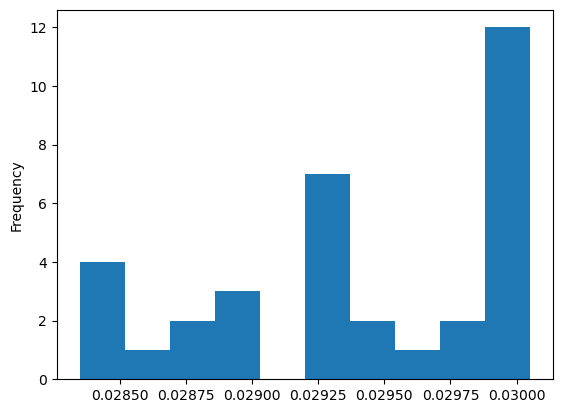

In [28]:
#Histogram
gdp['Year'].value_counts('2020').plot(kind='hist')

<Axes: >

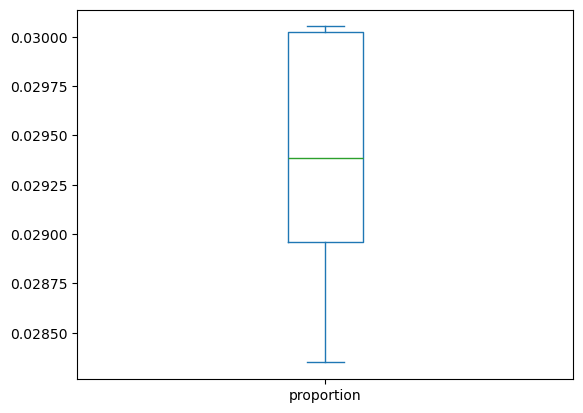

In [29]:
#Boxplot
gdp['Year'].value_counts('2020').plot(kind='box')

<Axes: ylabel='Density'>

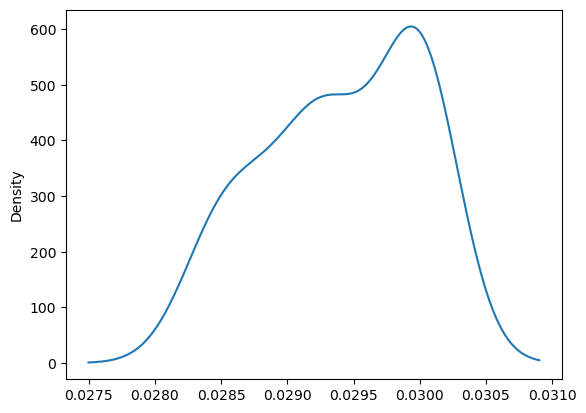

In [30]:
#Density PLot
gdp['Year'].value_counts('2020').plot(kind='kde')

In [31]:
#Violin ?
gdp['Year'].value_counts('2020').plot(kind='hexbin')

ValueError: plot kind hexbin can only be used for data frames

**10. What was the median GDP per capita value in 2020?**

#Scratch
gdp_year = gdp_df['Year']

#Scratch
type(gdp_year)

#Scratch
gdp_year = gdp_year.to_frame()

#Scratch
type(gdp_year)

##Scratch
year_2020_data = gdp_year=='2020'

In [ ]:
type(gdp_df)

In [ ]:
gdp.Year.value_counts()

In [ ]:
year_2020 = gdp.loc[gdp['Year'] == 2020]
year_2020

In [ ]:
year_2020.shape

In [ ]:
type(year_2020)

In [ ]:
year_2020.describe()

**11. Which country was the first to have a GDP per capita greater than $100,000?**

In [ ]:
#Zimbabwe ?
first_country = gdp.loc[gdp['GDP_Per_capita']<100000].tail()
first_country

**12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.**

In [ ]:
year_2020 = year_2020.reset_index()
year_2020

In [ ]:
#Luxembourg has the highest GDP in 2020.
year_2020.sort_values(by = 'GDP_Per_capita', ascending = False)

In [ ]:
sns.boxplot(data = year_2020, x = 'GDP_Per_capita')

**Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?**

In [ ]:
# Burundi has the lowest GDP in 2020 
year_2020.sort_values(by = 'GDP_Per_capita', ascending = True)

**14. Read in the internet use dataset into a DataFrame named internet_df.**

In [32]:
internet_use = pd.read_csv('../Data/internet_use.csv', nrows = 6083)
internet_use

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [33]:
type('Country or Area'), type('Year'), type('Value'), type('Value Footnotes')

(str, str, str, str)

**15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.**

In [34]:
int_use = internet_use.drop(columns=['Value Footnotes'])

In [35]:
int_use = int_use.rename(columns={'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'Internet_Users_Pct'})
int_use

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


**16. Look at the number of observations in this dataset per year. What do you notice?**

In [36]:
int_use.value_counts()

Country      Year  Internet_Users_Pct
Afghanistan  1990  0.0000                1
Nicaragua    2009  7.3000                1
             2018  37.6000               1
             2017  30.4000               1
             2016  24.5718               1
                                        ..
France       2013  81.9198               1
             2012  81.4400               1
             2011  77.8200               1
             2010  77.2800               1
Zimbabwe     2022  32.5615               1
Name: count, Length: 6083, dtype: int64

**17. What is the first year to have a non-zero internet users percentage value?**

In [37]:
int_use_non_zero = int_use.loc[int_use['Internet_Users_Pct'] > 0.00].sort_values(by = 'Year', ascending = False)
int_use_non_zero.tail()

,Country,Year,Internet_Users_Pct
3054,Korea (Republic of),1990,0.023265
5332,Switzerland,1990,0.595714
1010,Canada,1990,0.361000
3980,Netherlands (Kingdom of the),1990,0.334387
2892,Japan,1990,0.020294


**18. How does the distribution of internet users percent differ for 2000 and 2014?**

In [38]:
twozero_users = int_use.loc[int_use['Year'] == 2000]
twozero_users

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


In [39]:
onefour_users = int_use.loc[int_use['Year'] == 2014]
onefour_users

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


**19.For how many countries was the percentage of internet users below 5% in 2014?**

In [50]:
# 10 Countries had below 5% internet users
onefour_users_below_fivep = onefour_users.loc[onefour_users['Internet_Users_Pct'] < 5]
onefour_users_below_fivep

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [48]:
type(onefour_users_below_fivep)

pandas.core.frame.DataFrame

In [49]:
onefour_users_below_fivep.shape

(10, 3)

**20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.**